In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 14
import time, copy,os
from numpy import pi, sin, cos, tan
import control
from numpy.fft import fft

In [2]:
import os

In [131]:
pip install pyserial

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [4]:
import serial

In [132]:
pip install serial_utils

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Preparing metadata (setup.py) ... done
  Created wheel for serial_utils: filename=serial_utils-0.6-py3-none-any.whl size=3585 sha256=745274ed087a6f4d591300f993851aa66d5587059efd5da8ad0bdbf9895f2893
  Stored in directory: /Users/kraussry/Library/Caches/pip/wheels/19/67/a2/02ae7993b060f715a04be33d57b39292a931d393c90bfdd473
Successfully built serial_utils
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the nea

In [5]:
import serial_utils

In [8]:
import re

In [9]:
p = re.compile("^[0-9.]+,.*")

In [10]:
def data_to_float_array(data):
    mylist = data.split('\n')

    for i, rowstr in enumerate(mylist):
        if p.search(rowstr) is not None:
            #this is the start row
            start_ind = i
            break
                
    # search backwards for '#end'
    N = len(mylist)
    for i in range(1,N):
        ind = N-i
        rowstr = mylist[ind]
        if p.search(rowstr) is not None:
            end_ind = ind
            break
    
    clean_list = mylist[start_ind:end_ind]
    clean_2 = list(filter(None,clean_list))
    nested_list = [row.split(',') for row in clean_2]
    str_array = np.array(nested_list)
    float_array = str_array.astype(float)
    return float_array

In [11]:
pwd

'/Users/kraussry/345_F22/lab_prep/lab_04_CL_DC_motor'

In [12]:
ls /dev/tty*

/dev/tty                          /dev/ttysa
/dev/tty.BLTH                     /dev/ttysb
/dev/tty.Bluetooth-Incoming-Port  /dev/ttysc
/dev/tty.usbmodem142301           /dev/ttysd
/dev/ttyp0                        /dev/ttyse
/dev/ttyp1                        /dev/ttysf
/dev/ttyp2                        /dev/ttyt0
/dev/ttyp3                        /dev/ttyt1
/dev/ttyp4                        /dev/ttyt2
/dev/ttyp5                        /dev/ttyt3
/dev/ttyp6                        /dev/ttyt4
/dev/ttyp7                        /dev/ttyt5
/dev/ttyp8                        /dev/ttyt6
/dev/ttyp9                        /dev/ttyt7
/dev/ttypa                        /dev/ttyt8
/dev/ttypb                        /dev/ttyt9
/dev/ttypc                        /dev/ttyta
/dev/ttypd                        /dev/ttytb
/dev/ttype                        /dev/ttytc
/dev/ttypf                        /dev/ttytd
/dev/ttyq0                        /dev/ttyte
/dev/ttyq1                        /dev/ttytf
/dev/ttyq2

## Get the portname - Raspberry Pi Only

In [66]:
for i in range(10):
    portname = "/dev/ttyACM%i" % i
    if os.path.exists(portname):
        break
print("portname: %s" % portname)

portname: /dev/ttyACM9


## My Mac

In [67]:
portname = "/dev/tty.usbmodem142301"

In [68]:
ser = serial_utils.serial_test(portname)

In [69]:
ser.open()

In [111]:
ser.print_all()

In [112]:
ser.flush()

In [113]:
ser.write_char('s')

In [114]:
ser.print_all()

enter D.Kp



In [115]:
ser.write_float(5)

In [116]:
ser.print_all()

D.Kp = 5.00
enter D.Kd



In [117]:
ser.write_float(0.1)

In [118]:
data = ser.get_data()

In [119]:
data2 = ser.get_data()

In [120]:
data += data2

In [121]:
print(data)

D.Kd = 0.10
t0 =113273348
1.48,0,0,0,0
3.53,0,0,0,0
5.58,0,0,0,0
7.62,0,0,0,0
9.67,0,0,0,0
11.72,0,0,0,0
13.77,0,0,0,0
15.82,0,0,0,0
17.86,0,0,0,0
19.91,0,0,0,0
21.96,0,0,0,0
24.01,0,0,0,0
26.06,0,0,0,0
28.10,0,0,0,0
30.15,0,0,0,0
32.20,0,0,0,0
34.25,0,0,0,0
36.30,0,0,0,0
38.34,0,0,0,0
40.40,0,0,0,0
42.44,0,0,0,0
44.49,0,0,0,0
46.54,0,0,0,0
48.58,0,0,0,0
50.63,0,0,0,0
52.68,0,0,0,0
54.73,0,0,0,0
56.78,0,0,0,0
58.82,0,0,0,0
60.88,0,0,0,0
62.92,0,0,0,0
64.97,0,0,0,0
67.02,0,0,0,0
69.06,0,0,0,0
71.11,0,0,0,0
73.16,0,0,0,0
75.21,0,0,0,0
77.26,0,0,0,0
79.30,0,0,0,0
81.35,0,0,0,0
83.40,0,0,0,0
85.45,0,0,0,0
87.50,0,0,0,0
89.54,0,0,0,0
91.59,0,0,0,0
93.64,0,0,0,0
95.69,0,0,0,0
97.74,0,0,0,0
99.78,0,0,0,0
101.83,100,0,100,0
103.88,100,0,100,0
105.93,100,0,100,0
107.98,100,1,99,1
110.02,100,1,99,1
112.07,100,2,98,2
114.12,100,2,98,2
116.17,100,3,97,3
118.22,100,4,96,4
120.26,100,6,94,6
122.31,100,7,93,7
124.36,100,8,92,8
126.41,100,10,90,10
128.46,100,11,89,11
130.50,100,13,87,13
132.55,100,15,

In [122]:
float_array = data_to_float_array(data)

In [123]:
t = float_array[:,0]

In [124]:
if t[0] > 500:
    t[0] = 0

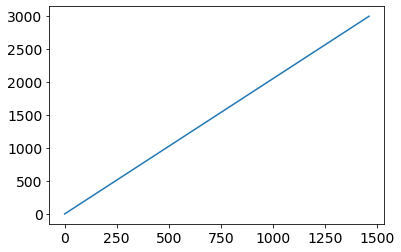

In [125]:
plt.figure()
plt.plot(t)

In [126]:
t[0:10]

array([ 1.48,  3.53,  5.58,  7.62,  9.67, 11.72, 13.77, 15.82, 17.86,
       19.91])

In [127]:
dt_array = t[1:]-t[0:-1]

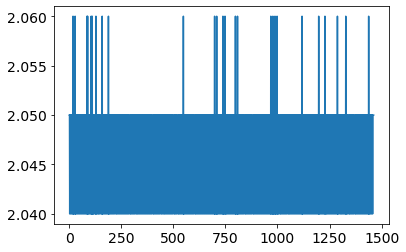

In [128]:
plt.figure()
plt.plot(dt_array)

In [129]:
v_in = float_array[:,-2]
v_out = float_array[:,-1]
u = float_array[:,1]

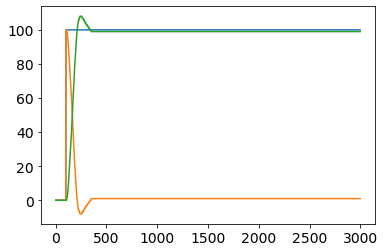

In [130]:
plt.figure()
plt.plot(t,u, t, v_in, t, v_out)
#plt.ylim([-5,260])
#plt.xlim([0,2000])
#plt.legend(['ax','ay','az'])

In [65]:
ser.close()

In [34]:
data_out = float_array

In [359]:
np.savetxt(fn,data_out,delimiter=',')